<a href="https://colab.research.google.com/github/love-bees/dataHacker/blob/master/08_TSERIES.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Series, Time Series

This post will be dedicated to time related data, or data where time plays an important role. Some examples where we can encounter such singals/series:
<ul>
<li>Stock exchange, daily exchange rates</li>
<li>Processes which change on a daily basis such as: temperature, air pollution</li>
<li>Number of passengers that travel with an airline company daily</li>
<li>Number of guests/tourists that visit a certain country/city/hotel in a day</li>
</ul>

In order to work with series, we will use the library `Pandas`. A series is actually represented using two NumPy arrays: `.index` and `.values`. The first is used to store time indexes. This can be an ordinal number (0, 1, 2, 3 ... or 10, 20, 30), date-year/month/day or time/hour/minute/second. The second array are the actual values of the series and it is stored in `series.values` array. Here we will store data about temperatures, number of tourists and similar.

Let's see how we can create a simplified time series by hand.

In [0]:
# Importing the library which is necessary for working with Series
from pandas import Series

In [0]:
# Loading the library needed to work with graphs
import matplotlib.pyplot as plt

In [0]:
series = Series ([1,2,2,4,6,9])

In [4]:
# The command head() gives us the first couple of elements of the series
# This is very useful when a series has a large amount of elements, making it hard to read
series.head()

0    1
1    2
2    2
3    4
4    6
dtype: int64

In [0]:
# We can see that a column for time indexing was automatically generated
# In this case, it's an array that starts from zero

In [6]:
# Time variable is accessed by using this command
series.index

RangeIndex(start=0, stop=6, step=1)

In [7]:
# The data elements can be accessed using this command
series.values

array([1, 2, 2, 4, 6, 9])

In [8]:
# The data type can be checked using this command 
type(series.values[0])

numpy.int64

The important thing when working with series is the way we can access the elements themselves in order to display it visually.

In [9]:
# We can also print the elements of the series, we access them as NumPy arrays
# We will stick to the values that are stored in the column series.index
series[0]
print (series[2], series[4])

2 6


In [0]:
# If we try to execute the command print(series[-1])
# we will get an error, because indexing in this way isn't defined (see also series.loc / series.iloc[])
# You can always type in series. and then press the TAB key. In this way, we can get aquainted
# with a large number of attributes and functions

In [11]:
# In this way we are able to index elements of a series just like with numpy arrays
print(series.iloc[-1])
print(series.iloc[-2])

9
6


In [0]:
# Using the function .plot() which is assigned to instances of the type series, we can get a quick visual of the series

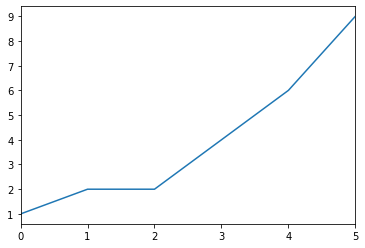

In [13]:
series.plot()

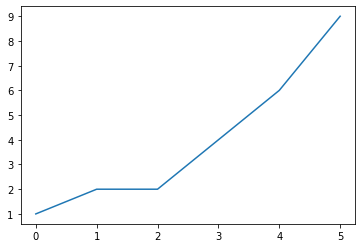

In [14]:
# If we use the standard library plt, we have some more options
# We can explictly adjust the time axis 
plt.plot(series.index, series.values)

Now, let's play with some real, historical series. They're usually saved in the .csv format and the first column can represent the date. Let's look at the file "[daily-total-female-births-CA.csv](https://www.kaggle.com/dougcresswell/daily-total-female-births-in-california-1959)" (follow the link and click Download). The dataset represents the number of female children who were born in one day in California. Moving on to code:

In [0]:
import pandas as pd
# In this way we're able to load the series.
# This is actually one .csv file (we can open it in Excel or LibreOffice as well)
data_csv = pd.read_csv('daily-total-female-births-CA.csv')
series_births = pd.Series(data = data_csv.births.values, index=data_csv.date)
series_births.index = pd.to_datetime(series_births.index)
# We imported the csv file using the read_csv function within the pandas library
# Next, we create a series, taking the births' values for the data and the dates as the index
# Lastly, we change the date (which is a string) and using the function to_datetime we're able to 
# change the string into a datetime value, which is very convenient for working with any sort of time variable

In [0]:
data_csv.index = pd.to_datetime(data_csv.index)

In [17]:
series_births.head()

date
1959-01-01    35
1959-01-02    32
1959-01-03    30
1959-01-04    31
1959-01-05    44
dtype: int64

In [18]:
# The table that we imported has two columns
# The first has dates, it's turned into the index
# The value of the actual daily values are in the values (lol ahah change this)
series_births.index

DatetimeIndex(['1959-01-01', '1959-01-02', '1959-01-03', '1959-01-04',
               '1959-01-05', '1959-01-06', '1959-01-07', '1959-01-08',
               '1959-01-09', '1959-01-10',
               ...
               '1959-12-22', '1959-12-23', '1959-12-24', '1959-12-25',
               '1959-12-26', '1959-12-27', '1959-12-28', '1959-12-29',
               '1959-12-30', '1959-12-31'],
              dtype='datetime64[ns]', name='date', length=365, freq=None)

In [19]:
# We can see that the data type we have here is actually
# Timestamp, which Python uses for working with dates
type (series_births.index[0])

pandas._libs.tslibs.timestamps.Timestamp

In [20]:
series_births.index[0]

Timestamp('1959-01-01 00:00:00')

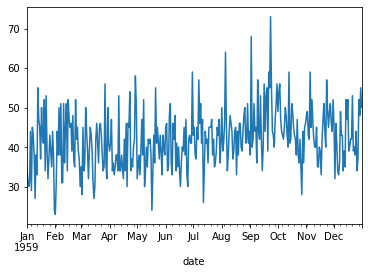

In [21]:
series_births.plot()

We imported a dataframe, turned it into a series and did the following: we realized that there exists a format in Python that structures date-time and it's called a timestamp, we plotted a series and saw that it shows how many kids are born every day during a year. We can describe this series with some basic statistical parameters. Take a look at the command `.describe()`.

In [0]:
# Working with a variable type Series gives us an overview of some statistical data

In [23]:
series_births.describe()
# gives elementary statistical data
# number of elements in a series - count, mean
# standard deviation - std, smallest and largest element in the series - min and max

count    365.000000
mean      41.980822
std        7.348257
min       23.000000
25%       37.000000
50%       42.000000
75%       46.000000
max       73.000000
dtype: float64

In [0]:
# Working with series and time indexing is very useful
# We can see how many children were born only in July
# Let's make a new series for the month of July
july = series_births['1959-07']

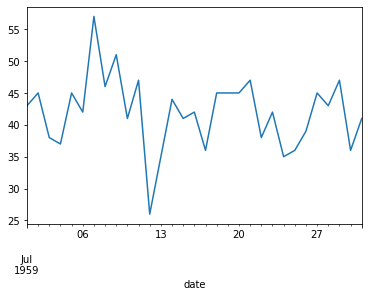

In [25]:
july.plot()

In [26]:
# We can search for days with highest birth numbers, as well as lowest
print ("Lowest number of births in a day was %.f " % july.min() )
print ("And that happened on this day :", july.idxmin())

print ("Highest number of births in a day was %.f " % july.max() )
print ("And that happened on this day :", july.idxmax())

Lowest number of births in a day was 26 
And that happened on this day : 1959-07-12 00:00:00
Highest number of births in a day was 57 
And that happened on this day : 1959-07-07 00:00:00


In case we're interested in just looking into one month, for example July, we can create a new series - July. We can analyze it independently of the rest of the data. We can determine the smallest number of children born and what date it was.

Working with series gives us an opportunity to create some advanced graphs: histograms and boxplots.

Boxplot is a type of graphical display. In our example, it will give an average value for every month - green horizontal line. In the blue rectangle is 50% of all the values. Also, we can display outliers as independent points. Boxplots are very useful when we want to keep track of a trend and to check if we have a growth or not.

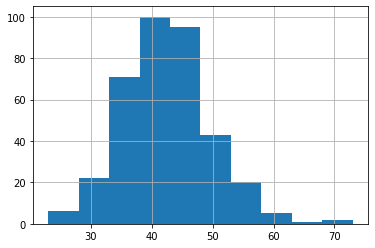

In [27]:
# Usually it's useful to draw a histogram and to check how the values are distributed
# The histogram takes the values of the number of born children along the x-axis
# Along the y-axis, the histogram displays the frequency of that event occuring.

# Notice that the number of days that had between 38 and 43 children born is 100 in the year of analysis
series_births.hist()

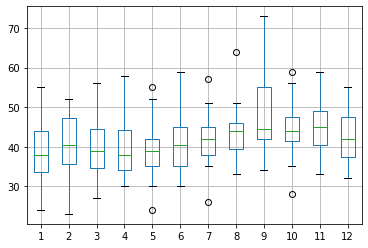

In [37]:
# Another interesting example of graphic visualization is displayed using boxplot()
# Just for practice, we will repeat the whole code process needed to acheive this

from pandas import Series
from pandas import DataFrame
from pandas import concat
from matplotlib import pyplot

data_csv = pd.read_csv('daily-total-female-births-CA.csv')

groups = series_births.groupby(pd.Grouper(freq='M'))

months = DataFrame()
months = concat([DataFrame(x[1].values) for x in groups], axis=1)

months = DataFrame(months)
months.columns = range(1,13)
months.boxplot()

How are boxplots actually made? First, we made a variable groups. It contains groups of data by months - M (Month).

Check on your end what happens when you run the next bit of code, just to make the structure of the group more clear:

```python
for x in groups:
           print (x[1].values)
           print (x[1].index)
```

The variable `month` represents a matrix of 12 columns whose values are the number of born children in those months. Therefore, the number of rows is 31. In case a month has less days, the fields are filled out with NaN (Not a Number) values. This part of the code will be explained later when we get into more details on how to analyze DataFrame variables.